Pasos para el desafío 1: 

Lo primero que se debe realizar es el proceso de instalación de librerías necesarias para poder ejecutar el proceso de Machine Learning. En este caso, lo primero que se debe instalar es el paquete de mlflow para poder tener el seguimiento de la aplicación de los modelos de inteligencia artificial

In [0]:
# Instalar mlflow
%pip install mlflow

Python interpreter will be restarted.
Python interpreter will be restarted.


Luego viene todo el proceso de importación de librerías necesarias para poder realizar el proceso de análisis de datos y la aplicación de técnicas de inteligencia artificial

In [0]:
# Importar librerías necesarias
import pandas as pd  # Para manejar y procesar datos en formato DataFrame
import seaborn as sns  # Para visualización de datos con gráficos
import matplotlib.pyplot as plt  # Para crear gráficos
from pyspark.sql.functions import col, when, count  # Funciones para manipulación y transformación de datos en Spark
from pyspark.ml.feature import VectorAssembler, StandardScaler  # Herramientas para transformar datos y normalización
from pyspark.ml.classification import RandomForestClassifier  # Algoritmo de clasificación Random Forest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator  # Evaluador para modelos de clasificación
from pyspark.ml.stat import Correlation  # Para calcular la correlación entre características
import mlflow  # Para seguimiento y gestión de experimentos de machine learning
import mlflow.spark  # Para registrar modelos de Spark en MLflow

A partir de este punto, se empieza a realizar todo el proceso de importe del archivo correspondiente a las tipologías de las clases de vinos, en formato csv que viene desde la url mencionada previamente en el ejercicio.

In [0]:
# Leer el CSV desde el URL y convertirlo a un DataFrame de Spark
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
pdf = pd.read_csv(url, header=None) 

Luego, se empieza a generar el proceso de transformación y análisis del dato, pasando primero por una etapa previa de transformación del dataframe a un dataframe en Spark, para poder hacer las evaluaciones en este contexto.

In [0]:
# Transformar el dataframe a un dataframe de Spark
df = spark.createDataFrame(pdf)
df.show(5)

+---+-----+----+----+----+---+----+----+----+----+----+----+----+----+
|  0|    1|   2|   3|   4|  5|   6|   7|   8|   9|  10|  11|  12|  13|
+---+-----+----+----+----+---+----+----+----+----+----+----+----+----+
|  1|14.23|1.71|2.43|15.6|127| 2.8|3.06|0.28|2.29|5.64|1.04|3.92|1065|
|  1| 13.2|1.78|2.14|11.2|100|2.65|2.76|0.26|1.28|4.38|1.05| 3.4|1050|
|  1|13.16|2.36|2.67|18.6|101| 2.8|3.24| 0.3|2.81|5.68|1.03|3.17|1185|
|  1|14.37|1.95| 2.5|16.8|113|3.85|3.49|0.24|2.18| 7.8|0.86|3.45|1480|
|  1|13.24|2.59|2.87|21.0|118| 2.8|2.69|0.39|1.82|4.32|1.04|2.93| 735|
+---+-----+----+----+----+---+----+----+----+----+----+----+----+----+
only showing top 5 rows



Lo primero que se observa es que el ejercicio menciona que hay tres clases:

Clase 0: Corresponde a variedad A
Clase 1: Corresponde a variedad B
Clase 2: Corresponde a variedad C

Sin embargo, se observa que el proceso está teniendo diferencias, ya que la primera columna que sería en este caso la "clase", está enumerada como 1, 2 y 3. Lo que se realiza es un proceso de adecuación para tener las clases sumergidas dentro de las categorías mencionadas en el enunciado.

In [0]:
# Transformar la columna de clase en el DataFrame de Spark
df = df.withColumn("0", 
                   when(col("0") == 1, 0)
                   .when(col("0") == 2, 1)
                   .when(col("0") == 3, 2)
                   .otherwise(col("0")))
df.show(5)

+---+-----+----+----+----+---+----+----+----+----+----+----+----+----+
|  0|    1|   2|   3|   4|  5|   6|   7|   8|   9|  10|  11|  12|  13|
+---+-----+----+----+----+---+----+----+----+----+----+----+----+----+
|  0|14.23|1.71|2.43|15.6|127| 2.8|3.06|0.28|2.29|5.64|1.04|3.92|1065|
|  0| 13.2|1.78|2.14|11.2|100|2.65|2.76|0.26|1.28|4.38|1.05| 3.4|1050|
|  0|13.16|2.36|2.67|18.6|101| 2.8|3.24| 0.3|2.81|5.68|1.03|3.17|1185|
|  0|14.37|1.95| 2.5|16.8|113|3.85|3.49|0.24|2.18| 7.8|0.86|3.45|1480|
|  0|13.24|2.59|2.87|21.0|118| 2.8|2.69|0.39|1.82|4.32|1.04|2.93| 735|
+---+-----+----+----+----+---+----+----+----+----+----+----+----+----+
only showing top 5 rows



Como la url que contiene el archivo de csv, tiene solo la información de los datos, pero no tiene el nombre de las variables, para esta información hay que basarse del segundo archivo que es el que se encuentra en la url "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names". A continuación se realiza este proceso.

In [0]:
# Definir nombres de columnas
column_names = ["Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium",
                "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", 
                "Color_Intensity", "Hue", "OD280/OD315_of_Diluted_Wines", "Proline"]
df = df.toDF(*column_names)  # Asignar nombres a las columnas del DataFrame
df.show(5)

+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+
|Class|Alcohol|Malic_Acid| Ash|Alcalinity_of_Ash|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280/OD315_of_Diluted_Wines|Proline|
+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+
|    0|  14.23|      1.71|2.43|             15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92|   1065|
|    0|   13.2|      1.78|2.14|             11.2|      100|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4|   1050|
|    0|  13.16|      2.36|2.67|             18.6|      101|          2.8|      3.24|                

Después, empieza todo lo que es la parte del análisis exploratorio de datos, en donde se empieza a verificar si hay valores nulos en la base de datos o si hay valores atípicos.

In [0]:
# Verificar y reemplazar valores nulos
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()  # Contar valores nulos en cada columna
df = df.na.fill(value=0)  # Reemplazar valores nulos con 0

+-----+-------+----------+---+-----------------+---------+-------------+----------+--------------------+---------------+---------------+---+----------------------------+-------+
|Class|Alcohol|Malic_Acid|Ash|Alcalinity_of_Ash|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity|Hue|OD280/OD315_of_Diluted_Wines|Proline|
+-----+-------+----------+---+-----------------+---------+-------------+----------+--------------------+---------------+---------------+---+----------------------------+-------+
|    0|      0|         0|  0|                0|        0|            0|         0|                   0|              0|              0|  0|                           0|      0|
+-----+-------+----------+---+-----------------+---------+-------------+----------+--------------------+---------------+---------------+---+----------------------------+-------+



In [0]:
# Calcular límites para valores atípicos
quantiles = df.approxQuantile(df.columns, [0.25, 0.75], 0.05)  # Calcular los cuartiles
for i, c in enumerate(df.columns):
    q1, q3 = quantiles[i]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.filter((col(c) >= lower_bound) & (col(c) <= upper_bound))  # Filtrar valores atípicos

Posteriormente, se pretende realizar un análisis de correlación de variables mediante el coeficiente de correlación de Pearson, para poder identificar cuales son las variables mas influyentes en el modelo y así utilizarlas como punto de referencia.

In [0]:
# Crear el vector assembler para la correlación
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
df_vector = assembler.transform(df).select("features")  # Transformar datos en un vector de características

# Calcular y mostrar la matriz de correlación
correlation_matrix = Correlation.corr(df_vector, "features").head()  # Calcular la correlación de Pearson
corr_matrix = correlation_matrix[0].toArray()  # Convertir a array
corr_df = pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols)  # Crear DataFrame de pandas para visualización
print(corr_df)


                                 Class   Alcohol  Malic_Acid       Ash  \
Class                         1.000000 -0.394612    0.406537 -0.064767   
Alcohol                      -0.394612  1.000000    0.091478  0.248756   
Malic_Acid                    0.406537  0.091478    1.000000  0.176560   
Ash                          -0.064767  0.248756    0.176560  1.000000   
Alcalinity_of_Ash             0.589740 -0.365688    0.288319  0.281584   
Magnesium                    -0.218743  0.486657    0.109391  0.384502   
Total_Phenols                -0.750256  0.346371   -0.321027  0.132054   
Flavanoids                   -0.881872  0.329240   -0.395522  0.083341   
Nonflavanoid_Phenols          0.508976 -0.222915    0.237613  0.056298   
Proanthocyanins              -0.596832  0.254587   -0.179888  0.061311   
Color_Intensity               0.219951  0.548408    0.313315  0.229955   
Hue                          -0.622945  0.010041   -0.547987  0.003540   
OD280/OD315_of_Diluted_Wines -0.786519

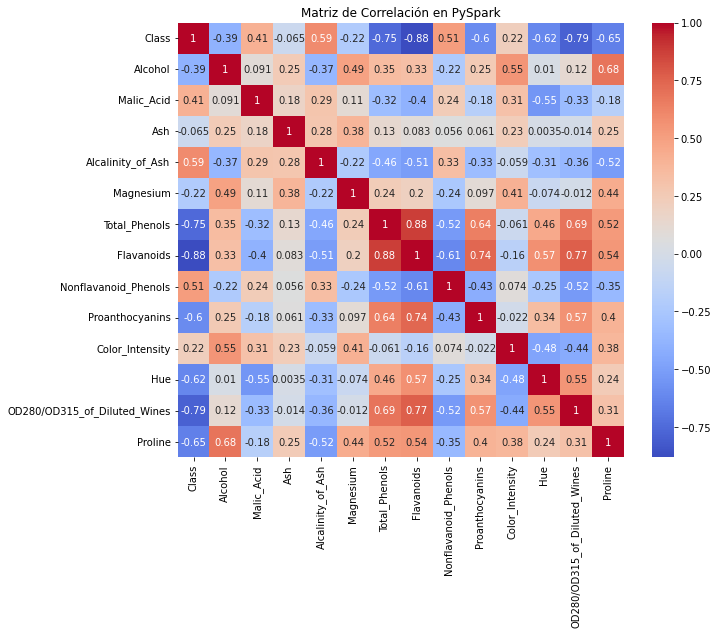

In [0]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación en PySpark')
plt.show()

Despues de esto, se concluye que los procesos que mas impactan son:

-OD280/OD315_of_Diluted_Wines: -0.79.
-Proline: 0.65.
-Flavanoids: -0.85.
-Total_Phenols: -0.72.

Estas variables son buenas candidatos para incluir en el modelo, ya que muestran una fuerte relación con la variable objetivo "class".


También es importante ver el balance de las instancias por clase, pero se puede identificar que para este ejercicio se encuentran equilibradas.

In [0]:
# Contar cuántas instancias hay de cada clase
df.groupBy("Class").count().show()

+-----+-----+
|Class|count|
+-----+-----+
|    0|   57|
|    1|   57|
|    2|   38|
+-----+-----+



Luego, se genera el proceso de normalización y la generación del vector para el ingreso al modelo.

In [0]:
# Seleccionar columnas recomendadas para el modelo y normalizarlas
selected_columns = ["OD280/OD315_of_Diluted_Wines", "Proline", "Flavanoids", "Total_Phenols"]

# Crear el vector assembler para las características
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
df = assembler.transform(df)  # Transformar los datos en un vector de características

# Aplicar el escalador estándar para normalizar las características
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(df)  # Ajustar el modelo de escalado a los datos
df = scaler_model.transform(df)  # Transformar los datos usando el modelo de escalado

In [0]:
df.show(5)

+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+--------------------+
|Class|Alcohol|Malic_Acid| Ash|Alcalinity_of_Ash|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280/OD315_of_Diluted_Wines|Proline|            features|      scaledFeatures|
+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+--------------------+
|    0|  14.23|      1.71|2.43|             15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92|   1065|[3.92,1065.0,3.06...|[5.56140222666580...|
|    0|   13.2|      1.78|2.14|             11.2|      100|         2.65|      2.76|                0.26|       

In [0]:
# Mostrar las primeras filas del DataFrame normalizado
df.select("scaledFeatures").show(5, truncate=False)

+---------------------------------------------------------------------------+
|scaledFeatures                                                             |
+---------------------------------------------------------------------------+
|[5.561402226665807,3.256615352639466,3.147209849007759,4.460906375890945]  |
|[4.823665196597894,3.2107475307713047,2.8386598638109195,4.221929248611072]|
|[4.497358433298625,3.623557927584758,3.3323398401258624,4.460906375890945] |
|[4.8946014494890395,4.525625090991934,3.589464827789895,6.133746266850049] |
|[4.156864419421127,2.2475232715399134,2.7666648672649905,4.460906375890945]|
+---------------------------------------------------------------------------+
only showing top 5 rows



Luego se realiza la división entre datos de entrenamiento (80%) y datos de test (20%).

In [0]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)  # Dividir datos
print("Training Data Count: " + str(train_data.count()))
print("Test Data Count: " + str(test_data.count()))


Training Data Count: 127
Test Data Count: 25


Para este ejercicio he dedidido utilizar la tecnica de clasificación Random Forest, utilizando 10 arboles para evitar overfitting, lo cual le brinda al modelo un resultado de una precisión del 92%

In [0]:
# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(labelCol="Class", featuresCol="scaledFeatures", numTrees=10)
rf_model = rf.fit(train_data)  # Ajustar el modelo a los datos de entrenamiento

# Hacer predicciones y evaluar el modelo
predictions = rf_model.transform(test_data)  # Predecir usando el modelo
evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)  # Evaluar precisión del modelo
print(f"Accuracy: {accuracy}")

Accuracy: 0.92


In [0]:
test_data.show(1)

+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+--------------------+
|Class|Alcohol|Malic_Acid| Ash|Alcalinity_of_Ash|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280/OD315_of_Diluted_Wines|Proline|            features|      scaledFeatures|
+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+--------------------+
|    0|   13.2|      1.78|2.14|             11.2|      100|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|                         3.4|   1050|[3.4,1050.0,2.76,...|[4.82366519659789...|
+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+-------

Luego se realiza el proceso de generación de mediciones y seguimiento con mlflow

In [0]:
# Registrar el modelo y la métrica en MLflow
experiment_path = "/Wine_Classification"
mlflow.set_experiment(experiment_path)  # Configurar el experimento en MLflow

with mlflow.start_run():
    mlflow.spark.log_model(rf_model, "model")  # Registrar el modelo en MLflow
    mlflow.log_metric("accuracy", accuracy)  # Registrar la métrica de precisión

2024/08/22 17:46:23 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2024/08/22 17:46:50 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/2748577224686756/20c15e2e4e4d426faf94716fd213da96/artifacts/model/sparkml, flavor: spark). Fall back to return ['pyspark==3.3.2', 'pandas<2']. Set logging level to DEBUG to see the full traceback. 
2024/08/22 17:46:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-pug-375 at: https://community.cloud.databricks.com/ml/experiments/2748577224686756/runs/20c15e2e4e4d426faf94716fd213da96.
2024/08/22 17:46:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/2748577224686756.


In [0]:
df.show(5)

+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+--------------------+
|Class|Alcohol|Malic_Acid| Ash|Alcalinity_of_Ash|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280/OD315_of_Diluted_Wines|Proline|            features|      scaledFeatures|
+-----+-------+----------+----+-----------------+---------+-------------+----------+--------------------+---------------+---------------+----+----------------------------+-------+--------------------+--------------------+
|    0|  14.23|      1.71|2.43|             15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04|                        3.92|   1065|[3.92,1065.0,3.06...|[5.56140222666580...|
|    0|   13.2|      1.78|2.14|             11.2|      100|         2.65|      2.76|                0.26|       

Por último se genera la predicción del modelo de machine learning con los ejemplos planteados en el enunciado del desafío.

In [0]:
# Realizar predicciones con nuevos datos
new_samples = [[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
               [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]]
new_df = spark.createDataFrame(new_samples, schema=selected_columns)  # Crear DataFrame para nuevos datos
new_df = assembler.transform(new_df)  # Transformar los nuevos datos usando el assembler
new_df = scaler_model.transform(new_df)  # Normalizar los nuevos datos usando el escalador ajustado
predictions = rf_model.transform(new_df)  # Predecir usando el modelo entrenado
predictions.select("prediction").show()  # Mostrar predicciones

+----------+
|prediction|
+----------+
|       1.0|
|       1.0|
+----------+

